# <center> EDA AND CLASSIFICATION IN ASTRONOMY

## 1. Configuring the Environment

### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook
import timeit

import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

/Users/ananthuraj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: DelftStack
  if __name__ == '__main__':


## 2. Data Preparation

### 2.1 Loading the data

In [2]:
%%time
df = pd.read_csv('5_lakh_entries.csv')

CPU times: user 1.19 s, sys: 238 ms, total: 1.43 s
Wall time: 1.61 s


In [3]:
%%time
df

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237670e+18,155.382532,24.207317,19.28256,17.57086,16.79196,16.39657,16.09448,5112,301,3,302,2.641520e+18,GALAXY,0.038369,2346,53734,594
1,1.237670e+18,157.916767,24.750359,18.67830,18.56849,18.28917,18.21018,17.68076,5112,301,3,318,1.177260e+19,QSO,0.310957,10456,58136,758
2,1.237670e+18,187.820956,25.008833,19.52375,18.46999,17.82306,17.46356,17.18872,5224,301,4,224,2.993820e+18,GALAXY,0.136041,2659,54498,196
3,1.237670e+18,188.318845,25.044754,19.35190,17.93390,17.19232,16.76381,16.44938,5224,301,4,228,2.993910e+18,GALAXY,0.049237,2659,54498,517
4,1.237650e+18,200.508103,66.579435,18.70436,17.43732,16.98066,16.69820,16.52279,1412,301,3,210,5.584880e+17,GALAXY,0.067645,496,51988,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1.237660e+18,188.528613,44.520913,17.15376,17.32718,17.76827,17.92905,17.82496,3813,301,2,244,7.471510e+18,STAR,0.000279,6636,56367,154
499996,1.237660e+18,189.100215,44.307299,17.23936,16.33151,16.12475,16.03764,16.03230,3813,301,2,247,1.544780e+18,STAR,-0.000304,1372,53062,179
499997,1.237660e+18,190.239559,44.428616,16.87802,15.75947,15.38949,15.25698,15.22448,3813,301,2,252,1.544750e+18,STAR,-0.000223,1372,53062,71
499998,1.237660e+18,194.268764,44.121439,19.36866,18.40845,18.17711,18.07653,18.05774,3813,301,2,271,1.545880e+18,STAR,-0.000017,1373,53063,61


### 2.2 Dataset Overview

The table results from an SQL query which joins two tables:

"PhotoObj" which contains photometric data  
"SpecObj" which contains spectral data.  
16 variables (double) and 1 additional variable (char) 'class'.  
A class object can be predicted from the other 16 variables.  

#### Variables description:  

**objid** = Object Identifier  
**ra** = J2000 Right Ascension (r-band)  
**dec** = J2000 Declination (r-band)  
**u** = better of deV/Exp magnitude fit (u-band)  
**g** = better of deV/Exp magnitude fit (g-band)  
**r** = better of deV/Exp magnitude fit (r-band)  
**i** = better of deV/Exp magnitude fit (i-band)  
**z** = better of deV/Exp magnitude fit (z-band)  
**run** = Run Number  
**rerun** = Rerun Number  
**camcol** = Camera column  
**field** = Field number  
**specobjid** = Object Identifier  
**class** = object class (galaxy, star or quasar object)  
**redshift** = Final Redshift  
**plate** = plate number  
**mjd** = MJD(Modified Julian Date) of observation  
**fiberid** = fiberID  

### 2.3 Basic information 

In [74]:
df.shape

(500000, 18)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
objid        500000 non-null float64
ra           500000 non-null float64
dec          500000 non-null float64
u            500000 non-null float64
g            500000 non-null float64
r            500000 non-null float64
i            500000 non-null float64
z            500000 non-null float64
run          500000 non-null int64
rerun        500000 non-null int64
camcol       500000 non-null int64
field        500000 non-null int64
specobjid    500000 non-null float64
class        500000 non-null object
redshift     500000 non-null float64
plate        500000 non-null int64
mjd          500000 non-null int64
fiberid      500000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 68.7+ MB


### Obervations

1. There are 500000 data points and 18 features.
2. There is only one categorical column.

### Dropping Features that are not significant

'objid' and 'specobjid' are only identifiers for getting to the rows back when they were put away in the original databank. Along these lines we won't need them for classification as they are not identified with the result.

Significantly more: The features 'run', 'rerun', 'camcol' and 'field' are values which describe portions of the camera right when mentioning the objective fact, for example 'run' speaks to the comparing check which caught the oject.

We'll drop these features.

In [4]:
df.drop(['run', 'rerun', 'camcol', 'field', 'objid', 'specobjid', 'fiberid'], axis = 1, inplace= True)
df.head(5)

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,155.382532,24.207317,19.28256,17.57086,16.79196,16.39657,16.09448,GALAXY,0.038369,2346,53734
1,157.916767,24.750359,18.67830,18.56849,18.28917,18.21018,17.68076,QSO,0.310957,10456,58136
2,187.820956,25.008833,19.52375,18.46999,17.82306,17.46356,17.18872,GALAXY,0.136041,2659,54498
3,188.318845,25.044754,19.35190,17.93390,17.19232,16.76381,16.44938,GALAXY,0.049237,2659,54498
4,200.508103,66.579435,18.70436,17.43732,16.98066,16.69820,16.52279,GALAXY,0.067645,496,51988


## 3. High Level Statistics

### 3.1 Describing the Data

In [7]:
df.describe()

,ra,dec,u,g,r,i,z,redshift,plate,mjd
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,179.616427,24.208243,18.633133,17.410295,16.888746,16.556613,16.400304,0.174370,2631.709010,53948.463334
std,77.432797,19.771872,0.830707,0.985691,1.131834,28.354250,28.357070,0.440725,2234.464062,1555.180439
min,0.001914,-19.669456,10.170250,9.300097,8.814259,-9999.000000,-9999.000000,-0.010111,266.000000,51578.000000
25%,140.238670,7.280409,18.205820,16.849950,16.199117,15.868670,15.624690,0.000003,1200.000000,52735.000000
50%,181.800068,22.675650,18.867110,17.516990,16.900855,16.613665,16.444055,0.045146,2101.000000,53757.000000
75%,224.296859,39.069320,19.267770,18.059930,17.592437,17.354980,17.248410,0.096017,2914.000000,54597.000000
max,359.999615,84.852149,19.600000,19.996050,33.209920,32.349170,30.017040,7.011245,12547.000000,58932.000000


In [8]:
df.shape

(500000, 11)

Now we have only 11 features and 500000 data points since 6 features which not significant to the class lable was dropped.

### 3.2 Find the duplicates

In [9]:
df.duplicated().sum()

0

### Observations

There are no duplicates

### 3.3 Unique Values

In [10]:
# We can find the number of unique values in the particular column using unique() function in python.
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [11]:
df['class'].value_counts()

GALAXY    252103
STAR      193384
QSO        54513
Name: class, dtype: int64

### 3.4 Visualizing the Unique counts  

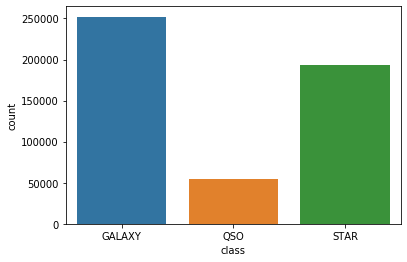

In [12]:
sns.countplot(df['class'])

### Observations

1. The column 'class' is the target variable and its a categorical variable. The unique values of the class label are 'GALAXY', 'QSO' and 'STAR'  
2. The dataset is quite imbalanced with number of galaxies dominating.

### 3.5 Find null values 

In [5]:
df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
mjd         0
dtype: int64

There are no null values.

## 4. Univariate Analysis

Distribution plots

Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points lie within that group. (histogram)

Probability Density Function (PDF) is the probability that the variable takes a value x. (smoothed version of the histogram)

### 4.1 Probability Density Function (PDF)

/Users/ananthuraj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


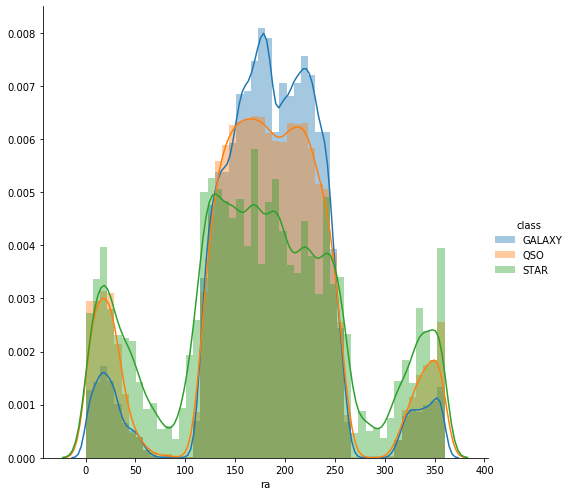

/Users/ananthuraj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


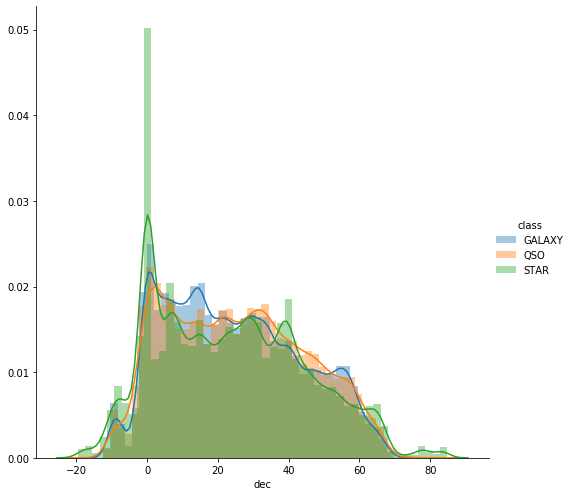

/Users/ananthuraj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


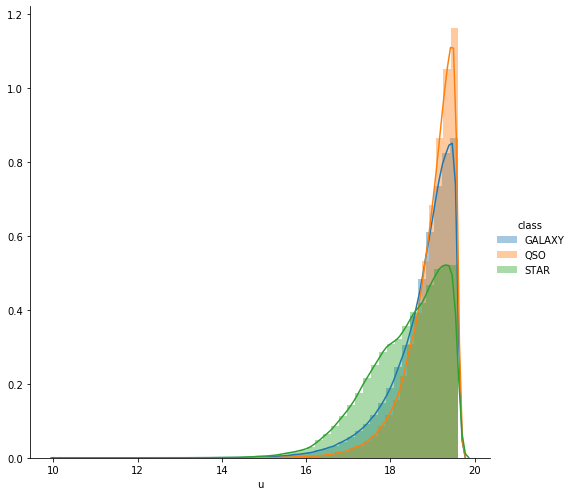

/Users/ananthuraj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


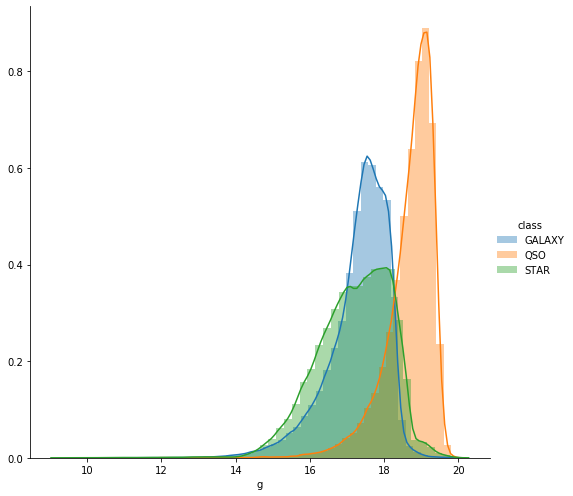

/Users/ananthuraj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


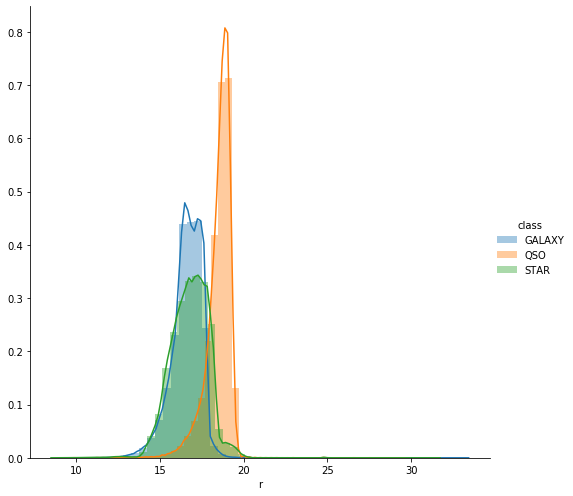

/Users/ananthuraj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


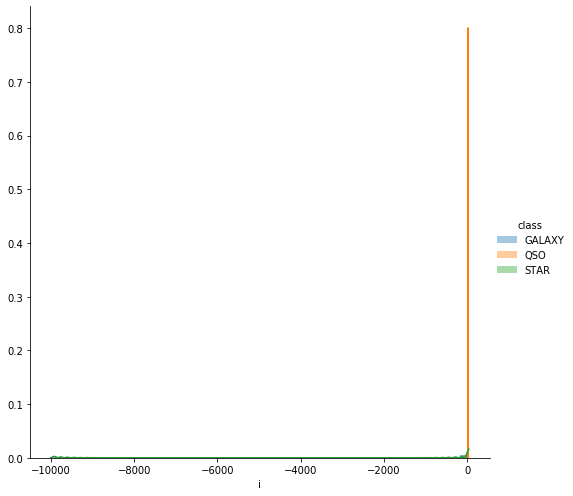

/Users/ananthuraj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


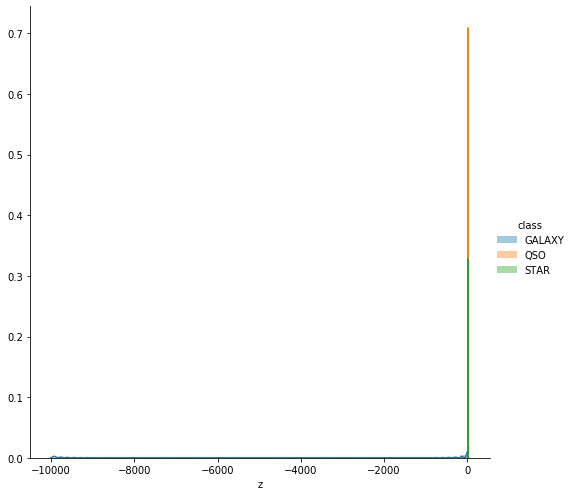

/Users/ananthuraj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: can't multiply sequence by non-int of type 'float'

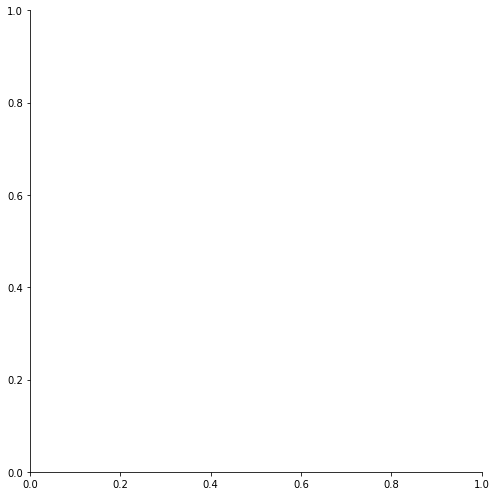

In [6]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='class', size=7)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

In [28]:
list(df.columns)

['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift', 'plate', 'mjd']

### 4.2 Histograms

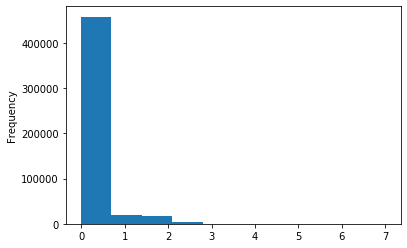

In [77]:
df['redshift'].plot(kind='hist')

In [ ]:
df['redshift'].plot(kind='bar')

KeyboardInterrupt: 

### 4.2 Cumulative Density Function (CDF)

### 4.3 Box Plots

In [8]:
c_names = list(df.columns)
c_names

['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift', 'plate', 'mjd']

IndexError: index 3 is out of bounds for axis 0 with size 3

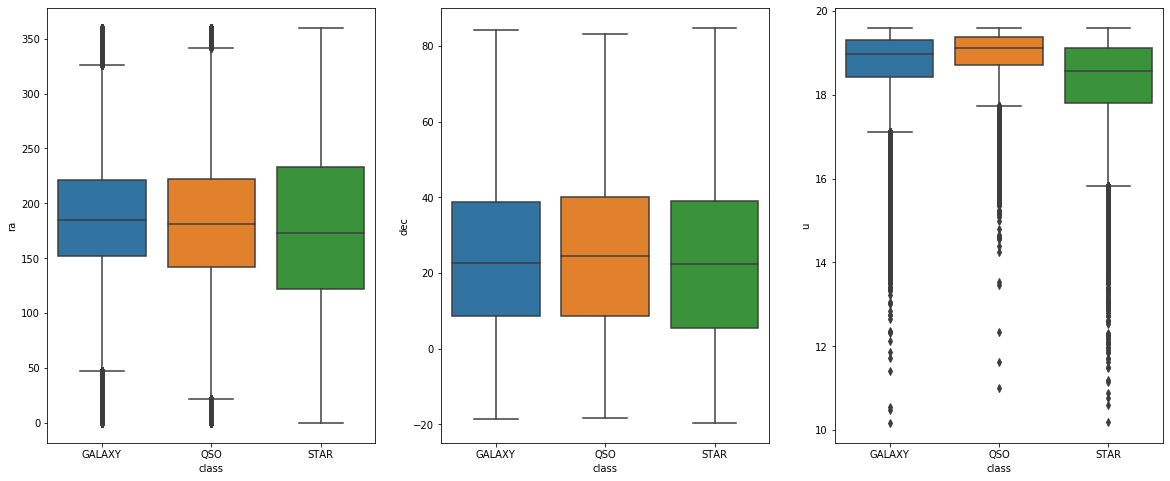

In [69]:
# box plot for all independent variables
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
for idx, feature in enumerate(c_names[:-1]):
    sns.boxplot( x='class', y = feature, data=df, ax=axes[idx])
plt.show()

In [ ]:
sns.boxplot(x='alive', y='u', hue='class', data=df)

### 4.2 Violin Plots

## 5. Multivariate Analysis

CPU times: user 5min 12s, sys: 28.5 s, total: 5min 40s
Wall time: 4min 59s


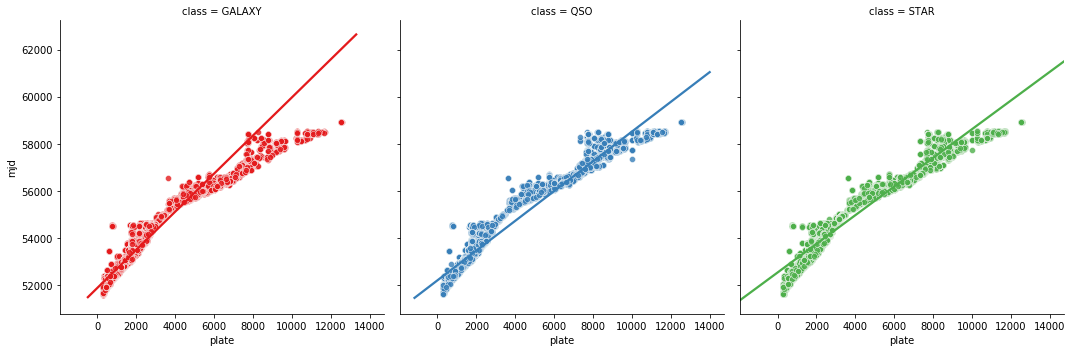

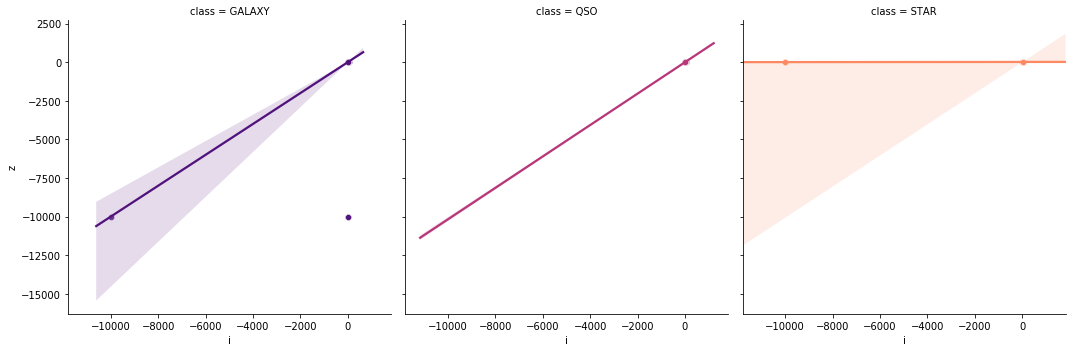

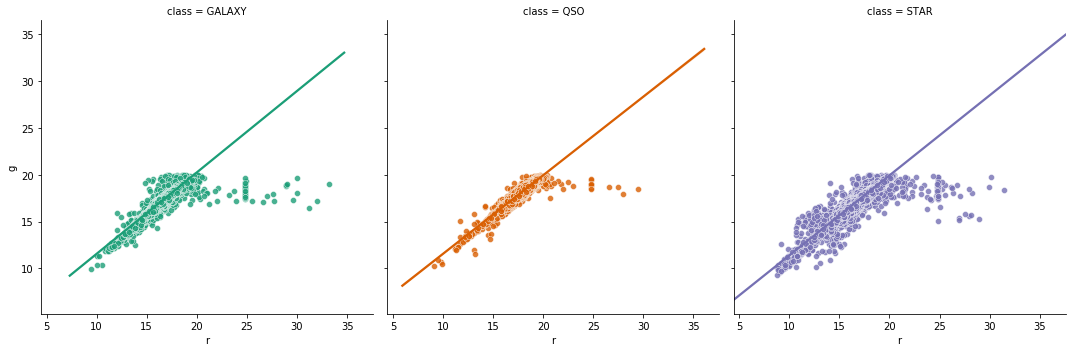

In [14]:
%%time
sns.lmplot(x = 'plate', y='mjd', data = df, hue='class', col = 'class', palette='Set1', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'i', y='z', data = df, hue='class', col = 'class', palette='magma', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'r', y='g', data = df, hue='class', col = 'class', palette='Dark2', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})

In [11]:
for i,j in enumerate(c_names):
    print(i,j)

0 ra
1 dec
2 u
3 g
4 r
5 i
6 z
7 class
8 redshift
9 plate
10 mjd
